# Import libraries and dataset

In [1]:
#Import the Warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import all required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Call data through URL and assign a variable
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTSS-TcErkXNk8KB0AlijhitwetxeHD2M3R0HJl2QPMAyFq0fxFX4PFKnzAWLDnratIz67DNL6GsZnV/pub?output=csv"
df = pd.read_csv(url)

In [4]:
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


## Check all null values

In [5]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

###### There are no null values

# Find the outliers

In [6]:
data = df[(df["release_year"] > 2040.65) | (df["release_year"] < 1987.70)]

In [7]:
data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
60,s42,Movie,Jaws,Steven Spielberg,United States,9/16/2021,1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas"
61,s43,Movie,Jaws 2,Jeannot Szwarc,United States,9/16/2021,1978,PG,116 min,"Dramas, Horror Movies, Thrillers"
62,s44,Movie,Jaws 3,Joe Alves,United States,9/16/2021,1983,PG,98 min,"Action & Adventure, Horror Movies, Thrillers"
63,s45,Movie,Jaws: The Revenge,Joseph Sargent,United States,9/16/2021,1987,PG-13,91 min,"Action & Adventure, Horror Movies, Thrillers"
182,s132,Movie,Blade Runner: The Final Cut,Ridley Scott,United States,9/1/2021,1982,R,117 min,"Action & Adventure, Classic Movies, Cult Movies"
...,...,...,...,...,...,...,...,...,...,...
8649,s7879,TV Show,Robotech,Not Given,United States,10/1/2016,1985,TV-MA,1 Season,Anime Series
8661,s7994,TV Show,Shaka Zulu,Not Given,Italy,1/10/2019,1986,TV-14,1 Season,TV Dramas
8697,s8190,TV Show,The Andy Griffith Show,Not Given,United States,7/1/2017,1967,TV-G,8 Seasons,"Classic & Cult TV, TV Comedies"
8702,s8232,Movie,The Bund,Not Given,Hong Kong,9/20/2018,1983,TV-14,103 min,"Action & Adventure, Dramas, International Movies"


## Additional cleaning

In [8]:
data['date_added'] = pd.to_datetime(data['date_added'])
data['year_added'] = data['date_added'].dt.year

In [9]:
data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added
60,s42,Movie,Jaws,Steven Spielberg,United States,2021-09-16,1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas",2021
61,s43,Movie,Jaws 2,Jeannot Szwarc,United States,2021-09-16,1978,PG,116 min,"Dramas, Horror Movies, Thrillers",2021
62,s44,Movie,Jaws 3,Joe Alves,United States,2021-09-16,1983,PG,98 min,"Action & Adventure, Horror Movies, Thrillers",2021
63,s45,Movie,Jaws: The Revenge,Joseph Sargent,United States,2021-09-16,1987,PG-13,91 min,"Action & Adventure, Horror Movies, Thrillers",2021
182,s132,Movie,Blade Runner: The Final Cut,Ridley Scott,United States,2021-09-01,1982,R,117 min,"Action & Adventure, Classic Movies, Cult Movies",2021
...,...,...,...,...,...,...,...,...,...,...,...
8649,s7879,TV Show,Robotech,Not Given,United States,2016-10-01,1985,TV-MA,1 Season,Anime Series,2016
8661,s7994,TV Show,Shaka Zulu,Not Given,Italy,2019-01-10,1986,TV-14,1 Season,TV Dramas,2019
8697,s8190,TV Show,The Andy Griffith Show,Not Given,United States,2017-07-01,1967,TV-G,8 Seasons,"Classic & Cult TV, TV Comedies",2017
8702,s8232,Movie,The Bund,Not Given,Hong Kong,2018-09-20,1983,TV-14,103 min,"Action & Adventure, Dramas, International Movies",2018


# Trimming of outliers

In [10]:
new_df = df[(df["release_year"] < 2040.65) & (df["release_year"] > 1987.70)]
new_df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


# Capping on outliers

In [11]:
upper_limit = df["release_year"].mean() + 3*df["release_year"].std()
lower_limit = df["release_year"].mean() - 3*df["release_year"].std()

# Now, apply the capping

In [12]:
df["release_year"] = np.where(
df["release_year"]>upper_limit,
upper_limit,
np.where(
df["release_year"]<lower_limit,
lower_limit,
df["release_year"]))

In [13]:
df.describe()

,release_year
count,8790.000000
mean,2014.516879
std,7.216340
min,1987.706765
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# Plot graph on release_year

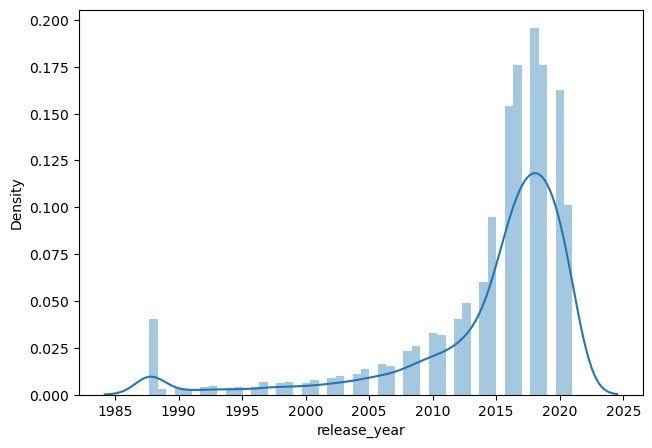

In [14]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["release_year"])

plt.show()

### CONVERTING THE SEASONS IN THE DURATION COLUMN TO MINUTES(ASSUMMING 1 SEASON=60 MIN)

In [15]:
import re
def convert_duration(duration_str):
    # Extract numeric values using regular expression
    numeric_values = re.findall(r'\d+', duration_str)
    
    if numeric_values:
        numeric_value = int(numeric_values[0])
        if 'min' in duration_str:
            # If 'min' is present, it's in minutes
            return numeric_value
        elif 'Season' in duration_str:
            # If 'season' is present, assume 60 minutes per season
            return numeric_value * 60
    
    return None  # Handle other cases if needed

# Apply the function to the 'duration' column and create a new 'duration_minutes' column
df['minutes'] = df['duration'].apply(convert_duration)

df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,minutes
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020.0,PG-13,90 min,Documentaries,90
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",60
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021.0,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",60
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021.0,TV-PG,91 min,"Children & Family Movies, Comedies",91
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993.0,TV-MA,125 min,"Dramas, Independent Movies, International Movies",125
...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016.0,TV-PG,2 Seasons,"International TV Shows, TV Dramas",120
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016.0,TV-Y7,3 Seasons,Kids' TV,180
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012.0,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",60
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016.0,TV-Y,1 Season,Kids' TV,60


In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,minutes
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020.0,PG-13,90 min,Documentaries,90
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",60
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021.0,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",60
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021.0,TV-PG,91 min,"Children & Family Movies, Comedies",91
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993.0,TV-MA,125 min,"Dramas, Independent Movies, International Movies",125
...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016.0,TV-PG,2 Seasons,"International TV Shows, TV Dramas",120
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016.0,TV-Y7,3 Seasons,Kids' TV,180
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012.0,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",60
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016.0,TV-Y,1 Season,Kids' TV,60


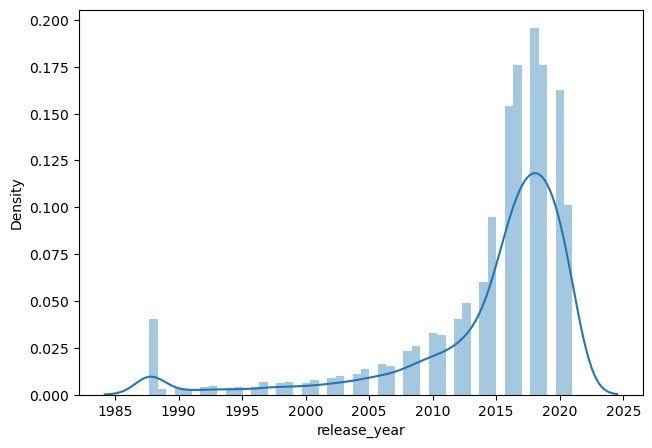

In [30]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["release_year"])

plt.show()